In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.integrate import quad, dblquad
import random
import math

# Laboratorio 4 Modelación y Simulación

## Parte 1 - Ejercicio Teórico
#### Responda a cada ejercicio en un documento que deberá subir como PDF
- - -
### Task 1
**Suponga que en un escenario totalmente ficticio existe un virus conocido como el virus T. Se ha descubierto que
este existe en el 0.5% de la población, y a la vez se ha desarrollado una prueba que es efectiva detectando el 97% de
las veces si una persona está infectada. Pero, esta prueba da un falso positivo el 0.1% de las veces. Considerando
esto conteste.**
- **Si una persona resulta con una prueba positiva para el virus T, ¿Cuál es la probabilidad de realmente tener dicho virus?**
  
  - **Datos importantes**
    - Prevalencia del virus (P(T)): 0.5% = 0.005
    - Sensibilidad de la prueba (P(Positivo|T)): 97% = 0.97
    - Falso positivo (P(Positivo|No T)): 0.1% = 0.001
      
      - **Teorema de Bayes:** P(T∣Positivo) = P(Positivo∣T)⋅P(T) / P(Positivo)
      - P(T∣Positivo)= (0.97×0.005) / 0.005845 ≈ 0.00485 / 0.005845 ≈ 0.8296 = **82.96%**
        
      - **La probabilidad de que una persona realmente tenga el virus dado que su prueba resultó positiva es aproximadamente 82.96%.**
     
​

- **Si un grupo de 5 personas se han tratado de refugiar y para ello han hecho una prueba cada uno. ¿Cuál es la probabilidad de que 3 resulten positivos? Si dado el caso estros tres resulten positivos en la prueba, ¿Cuál es la probabilidad de que al menos 2 tengan el virus?**
- - -
  - X será el número de personas que saldrá positivo.
  - P(X=3) = (5/3)⋅p^3⋅(1−p)^2
  - P(X=3) = 10⋅(0.005845)^3⋅(1−0.005845)^2
  - P(X=3) ≈ 10⋅(0.0000002)⋅(0.988348) = 10⋅0.000000197 ≈ 0.00000197 = **0.000197%**
  - **La probabilidad de que 3 de las 5 personas resulten positivas es aproximadamente 0.000197%.**
- - -
  - P(X≥2) = 1−P(X=0)−P(X=1)
  - P(X=0) = (3/0)⋅(0.8296)^0⋅(0.1704)^3 ≈ 0.00494
  - P(X=1) = (3/1)⋅(0.8296)^1⋅(0.1704)^2 ≈ 0.0723
  - P(X≥2) ≈ 1−(0.00494+0.0723)=1−0.07724 ≈ 0.9228 = **92.28%**
  - **La probabilidad de que al menos 2 de los 3 que resultaron positivos tengan el virus es aproximadamente 92.28%.**
- - -

## Parte 2 - Ejercicios sobre números aleatorios

### Task 1

Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un
rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de
una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.
1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.
2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de
ocurrencias de un evento?
* Los diferentes valores de lambda representan la tasa de frecuencia con la que pasan los eventos, a medida que tengamos una mayor tasa de ocurrencia mas alta va a ser la probabilidad de que el evento pase en un menor lapso de tiempo. Por eso a medida que $ \lambda $  es mas grande la distribución va a tener una asimetría más positiva.



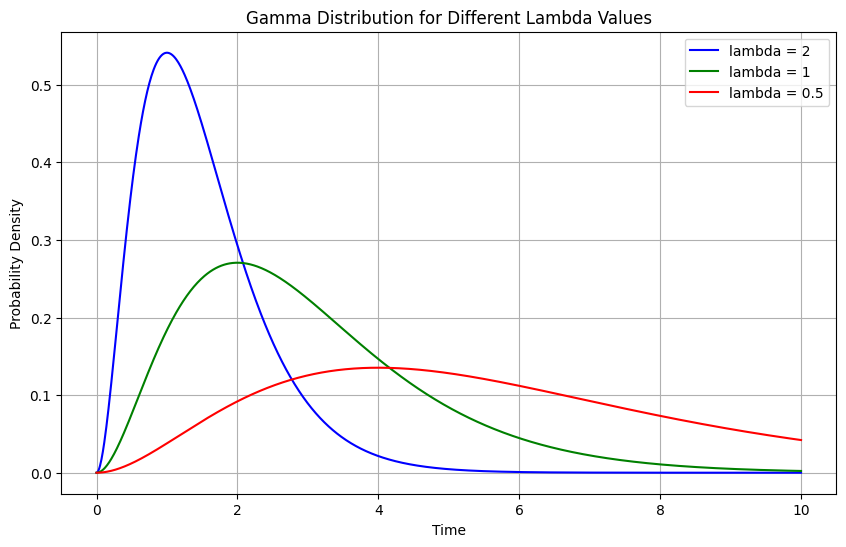

In [2]:
# Parameters
shape = 3  # k, the number of occurrences we are waiting for
lambdas = [2, 1, 0.5]  # Different lambda values (rate)
colors = ['blue', 'green', 'red']

# Plotting the Gamma distributions
x = np.linspace(0, 10, 1000)  # Range for x-axis (time)
plt.figure(figsize=(10, 6))

for lambd, color in zip(lambdas, colors):
    scale = 1 / lambd  # theta = 1 / lambda
    y = gamma.pdf(x, a=shape, scale=scale)  # Gamma PDF
    plt.plot(x, y, color=color, label=f'lambda = {lambd}')

plt.title('Gamma Distribution for Different Lambda Values')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

- - -
### Task 2

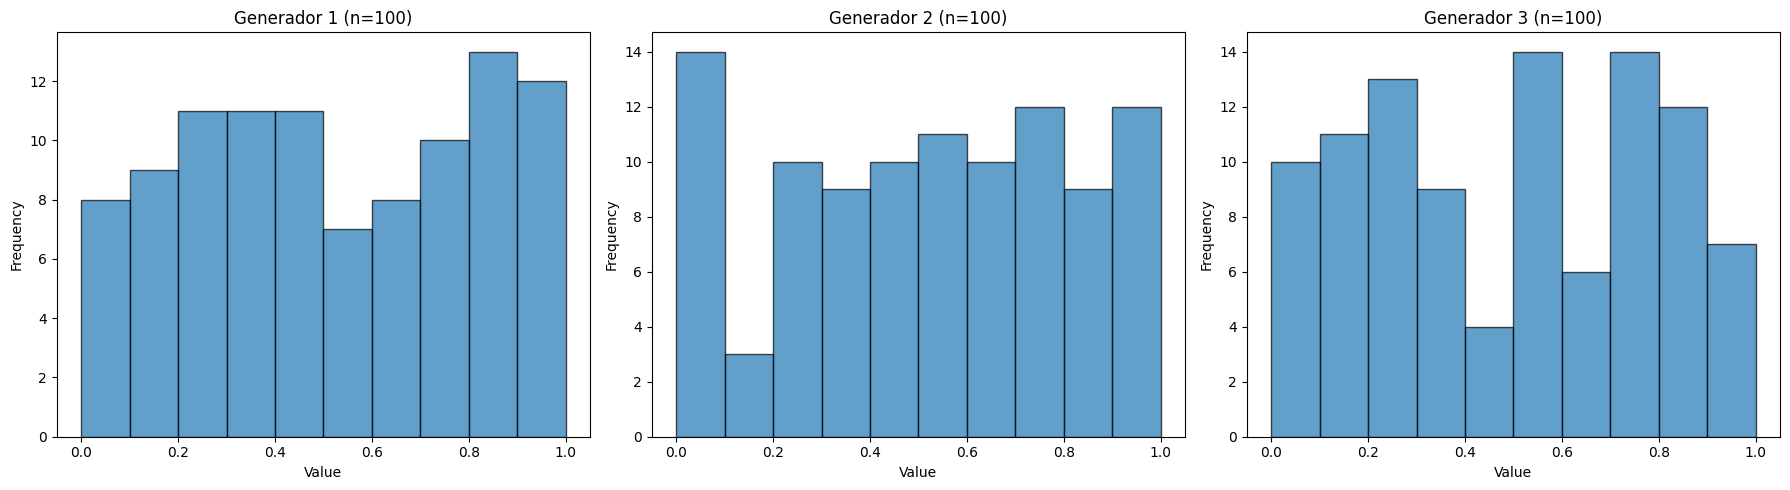

In [11]:
# Generador 1
def generador1(seed, n):
    m = 2**35 - 1
    a = 5**5
    x = seed
    results = []
    for _ in range(n):
        x = (a * x) % m
        results.append(x / m)
    return results

# Generador 2
def generador2(seed, n):
    m = 2**31 - 1
    a = 7**5
    x = seed
    results = []
    for _ in range(n):
        x = (a * x) % m
        results.append(x / m)
    return results

# Generador 3
def generador3(n):
    return [random.random() for _ in range(n)]

# Parámetros
seed = 1
n = 100

# Graficar histogramas para 100 repeticiones
data1 = generador1(seed, n)
data2 = generador2(seed, n)
data3 = generador3(n)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(data1, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 1 (n=100)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data2, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 2 (n=100)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data3, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 3 (n=100)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


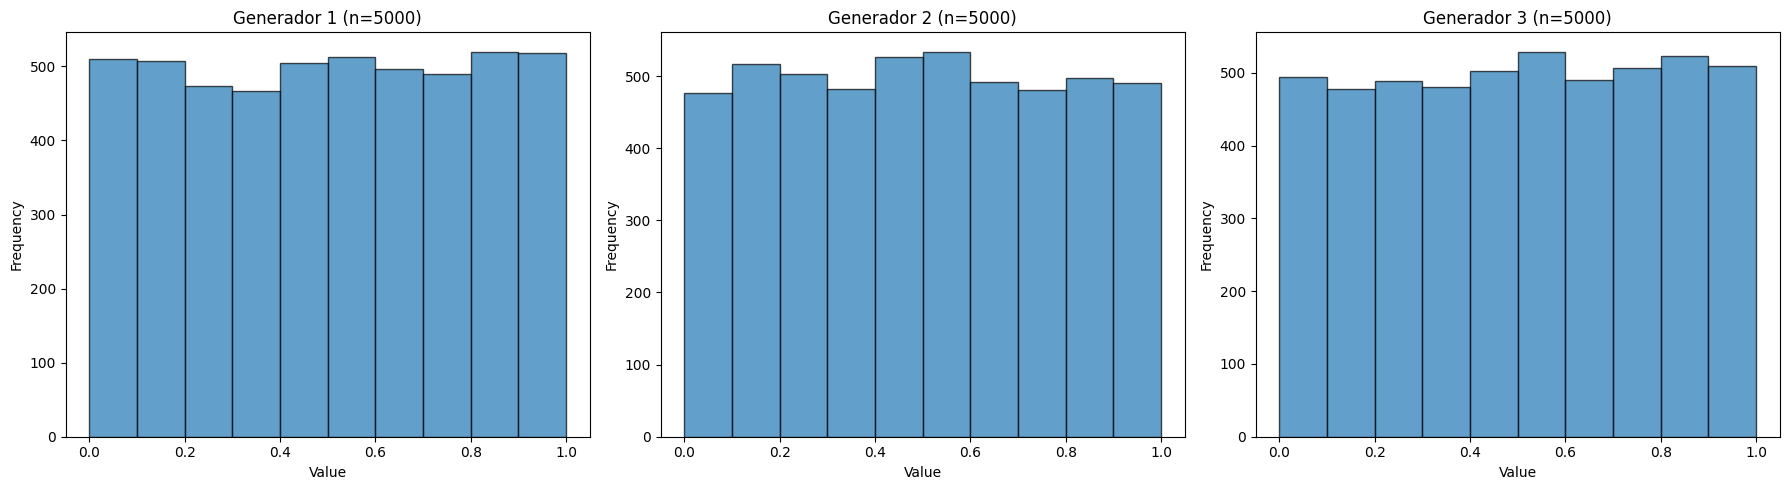

In [12]:
# Parámetros
n = 5000

# Graficar histogramas para 5000 repeticiones
data1 = generador1(seed, n)
data2 = generador2(seed, n)
data3 = generador3(n)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(data1, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 1 (n=5000)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data2, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 2 (n=5000)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data3, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 3 (n=5000)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


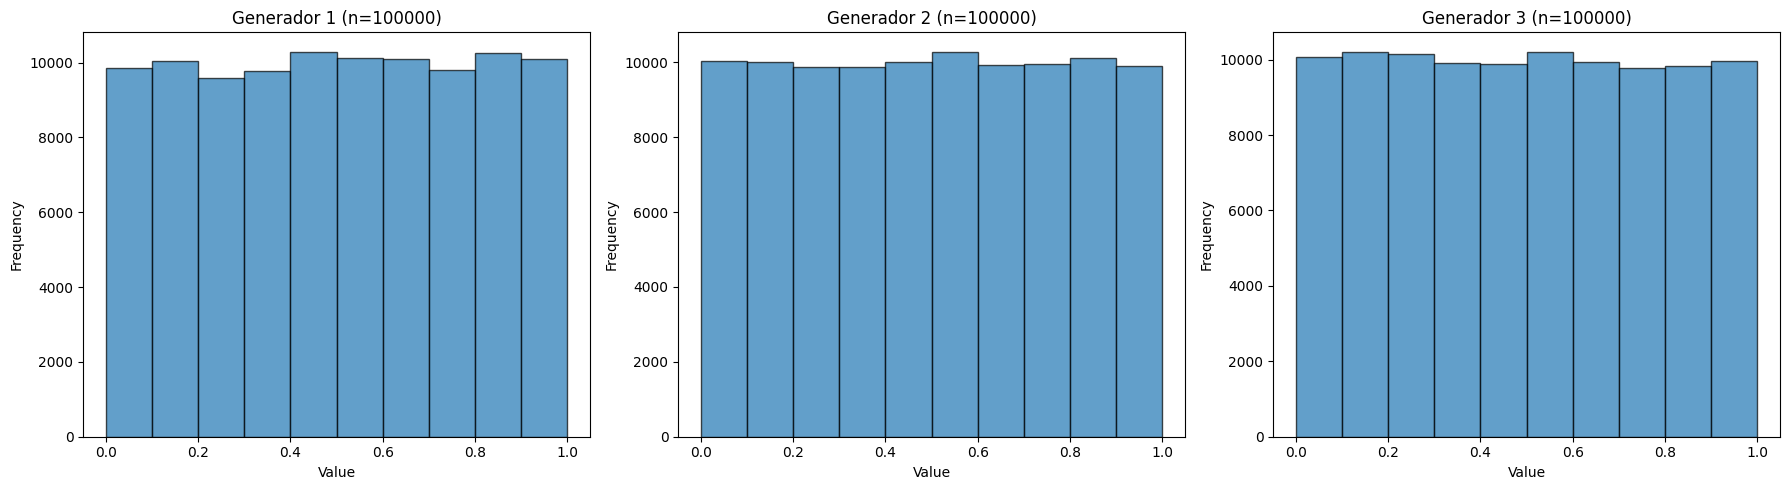

In [13]:
# Parámetros
n = 100000

# Graficar histogramas para 100000 repeticiones
data1 = generador1(seed, n)
data2 = generador2(seed, n)
data3 = generador3(n)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(data1, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 1 (n=100000)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data2, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 2 (n=100000)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data3, bins=[i/10.0 for i in range(11)], edgecolor='black', alpha=0.7)
plt.title('Generador 3 (n=100000)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?**
- Ambos generadores tienden a una distribución uniforme a medida que aumentan las muestras, lo que es un comportamiento esperado en buenos generadores de números pseudoaleatorios. Sin embargo, tenemos que el generador 2 muestra una distribución ligeramente más uniforme en las pruebas con 100 y 5000 muestras, comparado con el Generador 1. Aunque la diferencia no es muy significativa, podría indicar que el Generador 2 tiene un mejor rendimiento en términos de la uniformidad de la distribución en tamaños de muestras más pequeños.

### Task 3 - Montecarlo
Considere la siguiente integral y responda

$$ \theta = \int_{-\infty}^{\infty} e^{-x^2} dx = 1.772453 $$

1. Transforme la integral a una con límites de 0 a 1, muestre su procedimiento\n
2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [2]:
# Define the function to integrate
def integrand(x):
    return np.exp(-x**2)

# Perform the integration from 0 to 1
result, error = quad(integrand, 0, 1)

# Print the result
print("Area under the curve:", result)
print("Estimated error:", error)

Area under the curve: 0.7468241328124271
Estimated error: 8.291413475940725e-15


In [5]:
def function(x):
    return (math.e**(-x**2))

def is_within_function(xy: tuple):
    y_fun = function(xy[0])

    if xy[1] <= y_fun:
        return True
    
    return False

def calculate_area(samples):
    samples_inside_fun = 0
    for i in range(samples):
        random_tuple = (random.random(), random.random())

        if is_within_function(random_tuple):
            samples_inside_fun+=1

    return samples_inside_fun/samples

print(f'The aproximated area with 100 iterations is: {calculate_area(100)}')
print(f'The aproximated area with 10,000 iterations is: {calculate_area(10_000)}')
print(f'The aproximated area with 100,000 iterations is: {calculate_area(100_000)}')

The aproximated area with 100 iterations is: 0.76
The aproximated area with 10,000 iterations is: 0.7513
The aproximated area with 100,000 iterations is: 0.74841


### Task 4
Consiere la integral y responda:

$$ \theta = \int_{0}^{\infty}\int_{0}^{x} e^{-(x+y)} dydx = 0.5 $$

In [6]:
# Define the integrand function
def integrand(y, x):
    return np.exp(-(x + y))

# Define the integration limits for x and y
x_lower = 0
x_upper = 1
y_lower = lambda x: 0
y_upper = lambda x: 1

# Perform the double integration
result, error = dblquad(integrand, x_lower, x_upper, y_lower, y_upper)

# Print the result and estimated error
print("Result of the double integral:", result)
print("Estimated error:", error)

Result of the double integral: 0.39957640089372803
Estimated error: 7.00272561855019e-15


In [9]:
def is_within_function3D(xyz: tuple):
    true_z = integrand(xyz[0], xyz[1])

    if xyz[2] <= true_z:
        return True
    
    return False

def calculate_volume(samples):
    samples_inside_fun = 0
    for _ in range(samples):
        random_tuple = (random.random(), random.random(), random.random())

        if is_within_function3D(random_tuple):
            samples_inside_fun+=1

    return samples_inside_fun/samples

print(f'The aproximated volume with 100 iterations is: {calculate_volume(100)}')
print(f'The aproximated volume with 10_000 iterations is: {calculate_volume(10_000)}')
print(f'The aproximated volume with 100_000 iterations is: {calculate_volume(100_000)}')

The aproximated volume with 100 iterations is: 0.32
The aproximated volume with 10_000 iterations is: 0.4039
The aproximated volume with 100_000 iterations is: 0.39816
